0th iteration, cost is 11.859206483294791
10th iteration, cost is 10.75447835809521
20th iteration, cost is 10.258604174897275
30th iteration, cost is 9.90878487778367
40th iteration, cost is 9.654345490040985
50th iteration, cost is 9.464327899911986
60th iteration, cost is 9.319235942987099
70th iteration, cost is 9.20638557239545
80th iteration, cost is 9.117253686872841
90th iteration, cost is 9.04594136540018
100th iteration, cost is 8.98825806982328
110th iteration, cost is 8.941158708200412
120th iteration, cost is 8.902386800022658
130th iteration, cost is 8.870241668876245
140th iteration, cost is 8.84342250693574
150th iteration, cost is 8.820921432628639
160th iteration, cost is 8.801948587980494
170th iteration, cost is 8.785878685485917
180th iteration, cost is 8.772212221743128
190th iteration, cost is 8.760546912540851
200th iteration, cost is 8.750556374192643
210th iteration, cost is 8.741974021485305
220th iteration, cost is 8.734580773497136
230th iteration, cost is 

C:\Users\manlab\anaconda3\envs\aiprice\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manlab\anaconda3\envs\aiprice\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manlab\anaconda3\envs\aiprice\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21547 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manlab\anaconda3\envs\aiprice\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31958 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manlab\anaconda3\envs\aiprice\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manlab\anaconda3\envs\aiprice\lib\site-package

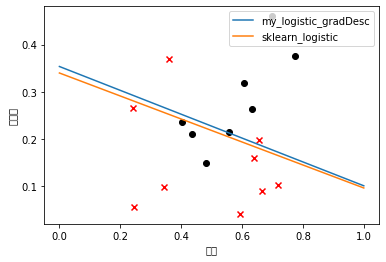

In [1]:
'''
与原书不同，原书中一个样本xi 为列向量，本代码中一个样本xi为行向量
尝试了两种优化方法，梯度下降和牛顿法。两者结果基本相同，不过有时因初始化的原因，
会导致牛顿法中海森矩阵为奇异矩阵，np.linalg.inv(hess)会报错。以后有机会再写拟牛顿法吧。

원서와 달리 원서의 샘플xi는 열 벡터, 이 코드에서 샘플xi는 행 벡터를 위한 두 가지 최적화 방법을 시도했다.
둘의 결과는 거의 같으나, 초기화로 인해 뉴턴법에서 하이젠 행렬이 기이한 행렬로 나타나 np.linalg.inv(hess)가 틀리게 되는 경우도 있다.나중에 기회가 되면 다시 의뉴턴법을 쓰자.
'''

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model


def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s


def J_cost(X, y, beta):
    '''
    :param X:  sample array, shape(n_samples, n_features)
    :param y: array-like, shape (n_samples,)
    :param beta: the beta in formula 3.27 , shape(n_features + 1, ) or (n_features + 1, 1)
    :return: the result of formula 3.27
    '''
    X_hat = np.c_[X, np.ones((X.shape[0], 1))]
    beta = beta.reshape(-1, 1)
    y = y.reshape(-1, 1)

    Lbeta = -y * np.dot(X_hat, beta) + np.log(1 + np.exp(np.dot(X_hat, beta)))

    return Lbeta.sum()


def gradient(X, y, beta):
    '''
    compute the first derivative of J(i.e. formula 3.27) with respect to beta      i.e. formula 3.30
    ----------------------------------
    :param X: sample array, shape(n_samples, n_features)
    :param y: array-like, shape (n_samples,)
    :param beta: the beta in formula 3.27 , shape(n_features + 1, ) or (n_features + 1, 1)
    :return:
    '''
    X_hat = np.c_[X, np.ones((X.shape[0], 1))]
    beta = beta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    p1 = sigmoid(np.dot(X_hat, beta))

    gra = (-X_hat * (y - p1)).sum(0)

    return gra.reshape(-1, 1)


def hessian(X, y, beta):
    '''
    compute the second derivative of J(i.e. formula 3.27) with respect to beta      i.e. formula 3.31
    ----------------------------------
    :param X: sample array, shape(n_samples, n_features)
    :param y: array-like, shape (n_samples,)
    :param beta: the beta in formula 3.27 , shape(n_features + 1, ) or (n_features + 1, 1)
    :return:
    '''
    X_hat = np.c_[X, np.ones((X.shape[0], 1))]
    beta = beta.reshape(-1, 1)
    y = y.reshape(-1, 1)

    p1 = sigmoid(np.dot(X_hat, beta))

    m, n = X.shape
    P = np.eye(m) * p1 * (1 - p1)

    assert P.shape[0] == P.shape[1]
    return np.dot(np.dot(X_hat.T, P), X_hat)


def update_parameters_gradDesc(X, y, beta, learning_rate, num_iterations, print_cost):
    '''
    update parameters with gradient descent method
    --------------------------------------------
    :param beta:
    :param grad:
    :param learning_rate:
    :return:
    '''
    for i in range(num_iterations):

        grad = gradient(X, y, beta)
        beta = beta - learning_rate * grad

        if (i % 10 == 0) & print_cost:
            print('{}th iteration, cost is {}'.format(i, J_cost(X, y, beta)))

    return beta


def update_parameters_newton(X, y, beta, num_iterations, print_cost):
    '''
    update parameters with Newton method
    :param beta:
    :param grad:
    :param hess:
    :return:
    '''

    for i in range(num_iterations):

        grad = gradient(X, y, beta)
        hess = hessian(X, y, beta)
        beta = beta - np.dot(np.linalg.inv(hess), grad)

        if (i % 10 == 0) & print_cost:
            print('{}th iteration, cost is {}'.format(i, J_cost(X, y, beta)))
    return beta


def initialize_beta(n):
    beta = np.random.randn(n + 1, 1) * 0.5 + 1
    return beta


def logistic_model(X, y, num_iterations=100, learning_rate=1.2, print_cost=False, method='gradDesc'):
    '''
    :param X:
    :param y:~
    :param num_iterations:
    :param learning_rate:
    :param print_cost:
    :param method: str 'gradDesc' or 'Newton'
    :return:
    '''
    m, n = X.shape
    beta = initialize_beta(n)

    if method == 'gradDesc':
        return update_parameters_gradDesc(X, y, beta, learning_rate, num_iterations, print_cost)
    elif method == 'Newton':
        return update_parameters_newton(X, y, beta, num_iterations, print_cost)
    else:
        raise ValueError('Unknown solver %s' % method)


def predict(X, beta):
    X_hat = np.c_[X, np.ones((X.shape[0], 1))]
    p1 = sigmoid(np.dot(X_hat, beta))

    p1[p1 >= 0.5] = 1
    p1[p1 < 0.5] = 0

    return p1


if __name__ == '__main__':
    data_path = r'./data/watermelon3_0_Ch.csv'
    #
    data = pd.read_csv(data_path).values

    is_good = data[:, 9] == '是'
    is_bad = data[:, 9] == '否'

    X = data[:, 7:9].astype(float)
    y = data[:, 9]

    y[y == '是'] = 1
    y[y == '否'] = 0
    y = y.astype(int)

    plt.scatter(data[:, 7][is_good], data[:, 8][is_good], c='k', marker='o')
    plt.scatter(data[:, 7][is_bad], data[:, 8][is_bad], c='r', marker='x')

    plt.xlabel('密度')
    plt.ylabel('含糖量')

    # 可视化模型结果
    beta = logistic_model(X, y, print_cost=True, method='gradDesc', learning_rate=0.3, num_iterations=1000)
    w1, w2, intercept = beta
    x1 = np.linspace(0, 1)
    y1 = -(w1 * x1 + intercept) / w2

    ax1, = plt.plot(x1, y1, label=r'my_logistic_gradDesc')

    lr = linear_model.LogisticRegression(solver='lbfgs', C=1000)  # 注意sklearn的逻辑回归中，C越大表示正则化程度越低。
    lr.fit(X, y)

    lr_beta = np.c_[lr.coef_, lr.intercept_]
    print(J_cost(X, y, lr_beta))

    # 可视化sklearn LogisticRegression 模型结果
    w1_sk, w2_sk = lr.coef_[0, :]

    x2 = np.linspace(0, 1)
    y2 = -(w1_sk * x2 + lr.intercept_) / w2

    ax2, = plt.plot(x2, y2, label=r'sklearn_logistic')

    plt.legend(loc='upper right')
    plt.show()